# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [73]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [74]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [75]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [76]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [77]:
y = data.MEDV
X = data.drop('MEDV',axis=1)
print(data.shape)
print(X.shape)
print(y.shape)



(506, 14)
(506, 13)
(506,)


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)
train_predictions = model.predict(X_train)
predictions = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [80]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, predictions)

print("r2_train = ", r2_train)
print("r2_test = " , r2_test)


r2_train =  0.7508856358979673
r2_test =  0.6687594935356317


## 4. Calculate and print mean squared error for both the training and the testing set.

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

tarinMSE = mean_squared_error(y_train, train_predictions)
testMSE = mean_squared_error(y_test, predictions)

print("tarinMSE = ",tarinMSE)
print("testMSE = ", testMSE)

tarinMSE =  21.641412753226312
testMSE =  24.291119474973538


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [82]:
tarinMAE = mean_absolute_error(y_train, train_predictions)
testMAE = mean_absolute_error(y_test, predictions)

print("tarinMAE = ",tarinMAE)
print("testMAE = ", testMAE)

tarinMAE =  3.3147716267832252
testMAE =  3.1890919658878416


## Classification Model Evaluation

In [83]:
from sklearn.datasets import load_iris
data = load_iris()

In [84]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [85]:
column_names = data.feature_names

In [86]:
df = pd.DataFrame(data['data'],columns=column_names)

In [87]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [88]:
target = pd.DataFrame(data.target)


In [89]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [90]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [112]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [115]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X = pd.DataFrame(data.data, columns= data.feature_names)
y = pd.Series(data.target, name="class")

# print(X.shape)
# print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(y_train.dtype)
print(X_test.shape)
print(y_test.shape)
print(y_test.dtype)

(120, 4)
(120,)
int32
(30, 4)
(30,)
int32


In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
from sklearn.linear_model import LogisticRegression
iris_model = LogisticRegression()

iris_model.fit(X_train,y_train)

train_predictions = iris_model.predict(X_train)
predictions = iris_model.predict(X_test)

# print(train_predictions.shape)
# print(train_predictions.dtype)


# print(predictions.shape) 
# print(predictions.dtype)

(120,)
int32
(30,)
int32


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [93]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

trainAccuracy = accuracy_score(y_train, train_predictions)
testAccuracy = accuracy_score(y_test, predictions)

print("trainAccuracy = ", trainAccuracy)
print("testAccuracy = ", testAccuracy)

trainAccuracy =  0.975
testAccuracy =  1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [94]:
train_Balanced_Accuracy = balanced_accuracy_score(y_train, train_predictions)
test_Balanced_Accuracy = balanced_accuracy_score(y_test, predictions)

print("train_Balanced_Accuracy = ", train_Balanced_Accuracy)
print("test_Balanced_Accuracy = ", test_Balanced_Accuracy)

train_Balanced_Accuracy =  0.975609756097561
test_Balanced_Accuracy =  1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score
train_percision = precision_score(y_train, train_predictions, average='weighted')
test_percision = precision_score(y_test, predictions, average='weighted')

print("train_percision = ", train_percision)
print("test_percision = ", test_percision)  

train_percision =  0.9767857142857144
test_percision =  1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [96]:
train_recall = recall_score(y_train, train_predictions, average='weighted')
test_recall = recall_score(y_test, predictions, average='weighted')

print("train_recall = ", train_recall)
print("test_recall = ", test_recall)    

train_recall =  0.975
test_recall =  1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [97]:
train_f1 = f1_score(y_train, train_predictions, average='weighted')
test_f1 = f1_score(y_test, predictions, average='weighted')

print("train_f1 = ", train_f1)
print("test_f1 = ", test_f1)

train_f1 =  0.9749882794186592
test_f1 =  1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [98]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, train_predictions)
test_cm = confusion_matrix(y_test, predictions)



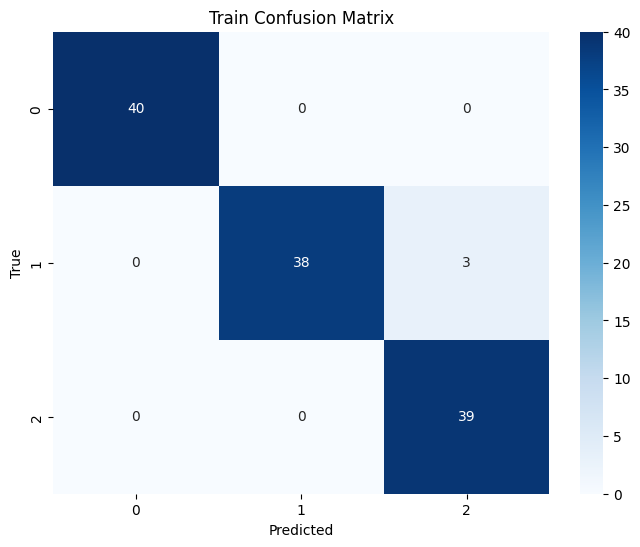

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Train Confusion Matrix')

# Show the plot
plt.show()

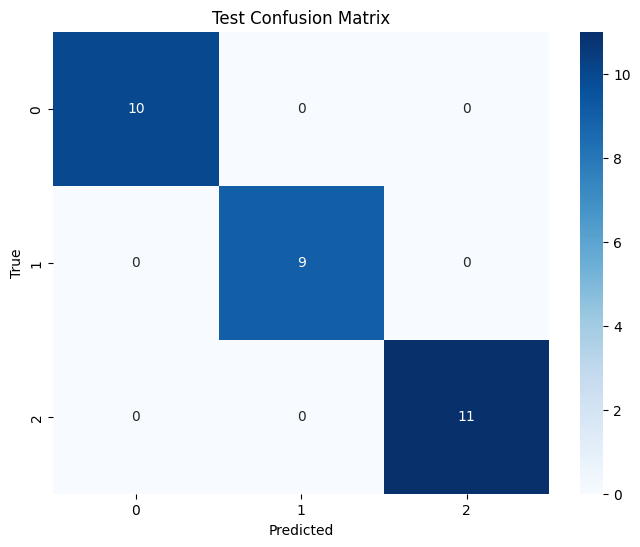

In [100]:
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix')

# Show the plot
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [101]:
from sklearn.tree import DecisionTreeClassifier

iris_model2 = DecisionTreeClassifier()

iris_model2.fit(X_train,y_train)

train_predictions = iris_model2.predict(X_train)
predictions = iris_model2.predict(X_test)


In [102]:
train2Accuracy = accuracy_score(y_train, train_predictions)
test2Accuracy = accuracy_score(y_test, predictions)

print("trainAccuracy = ", train2Accuracy)
print("testAccuracy = ", test2Accuracy)

trainAccuracy =  1.0
testAccuracy =  1.0


In [103]:
train2_Balanced_Accuracy = balanced_accuracy_score(y_train, train_predictions)
test2_Balanced_Accuracy = balanced_accuracy_score(y_test, predictions)

print("train_Balanced_Accuracy = ", train2_Balanced_Accuracy)
print("test_Balanced_Accuracy = ", test2_Balanced_Accuracy)

train_Balanced_Accuracy =  1.0
test_Balanced_Accuracy =  1.0


In [104]:
train2_percision = precision_score(y_train, train_predictions, average='weighted')
test2_percision = precision_score(y_test, predictions, average='weighted')

print("train_percision = ", train2_percision)
print("test_percision = ", test2_percision)  

train_percision =  1.0
test_percision =  1.0


In [105]:
train2_recall = recall_score(y_train, train_predictions, average='weighted')
test2_recall = recall_score(y_test, predictions, average='weighted')

print("train_recall = ", train2_recall)
print("test_recall = ", test2_recall)  

train_recall =  1.0
test_recall =  1.0


In [106]:
train2_f1 = f1_score(y_train, train_predictions, average='weighted')
test2_f1 = f1_score(y_test, predictions, average='weighted')

print("train_f1 = ", train2_f1)
print("test_f1 = ", test2_f1)

train_f1 =  1.0
test_f1 =  1.0
